In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('/content/portfolio_data.csv')

In [ ]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [ ]:
df.tail(10)

,Date,AMZN,DPZ,BTC,NFLX
1510,5/1/2019,1911.520020,271.459991,5500.720215,378.809998
1511,5/2/2019,1900.819946,274.320007,5753.379883,379.059998
1512,5/3/2019,1962.459961,279.750000,5840.080078,385.029999
1513,5/6/2019,1950.550049,282.019989,5819.569824,378.670013
1514,5/7/2019,1921.000000,277.390015,5998.709961,370.459991
1515,5/8/2019,1917.770020,283.149994,6171.959961,364.369995
1516,5/9/2019,1899.869995,282.160004,6358.290039,362.750000
1517,5/10/2019,1889.979980,278.369995,7191.359863,361.040009
1518,5/13/2019,1822.680054,273.880005,7980.129883,345.260010
1519,5/14/2019,1840.119995,272.859985,8183.830078,345.609985


In [ ]:
df.index

RangeIndex(start=0, stop=1520, step=1)

In [ ]:
df.columns

Index(['Date', 'AMZN', 'DPZ', 'BTC', 'NFLX'], dtype='object')

In [ ]:
df.size

7600

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [ ]:
np.unique(df['AMZN'])

array([ 248.229996,  252.550003,  255.720001, ..., 2012.709961,
       2012.97998 , 2039.51001 ])

In [ ]:
df.describe()

,AMZN,DPZ,BTC,NFLX
count,1520.000000,1520.000000,1520.000000,1520.000000
mean,821.541810,146.771695,2421.465669,147.668273
std,518.442653,72.192287,3310.894199,107.641486
min,248.229996,51.190983,69.660004,29.464285
25%,364.360001,84.993593,340.904999,62.851071
50%,686.459992,127.168053,625.304993,104.000000
75%,1121.287536,202.454994,3874.912415,192.207496
max,2039.510010,298.635986,18972.320310,418.970001


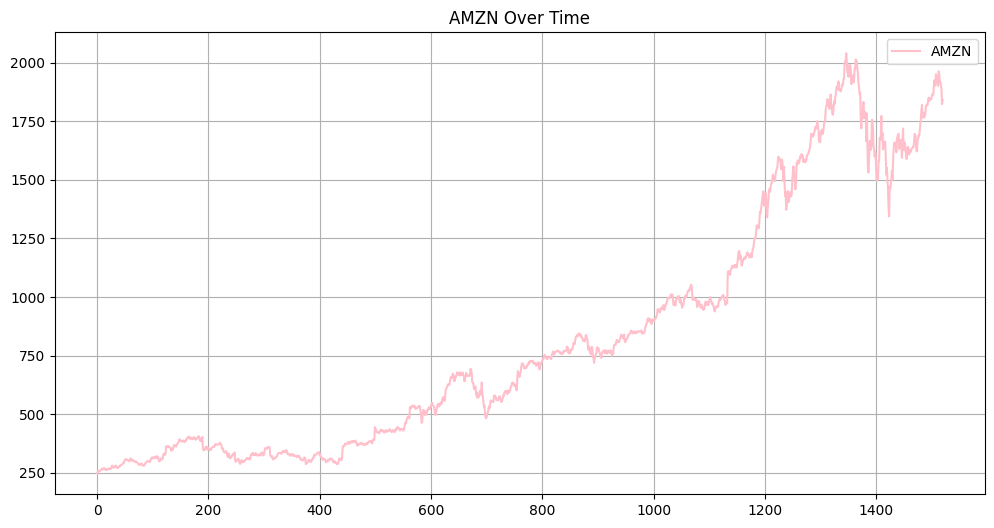

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['AMZN'], label='AMZN', color='pink')
plt.title('AMZN Over Time')
plt.legend()
plt.grid(True)
plt.show()

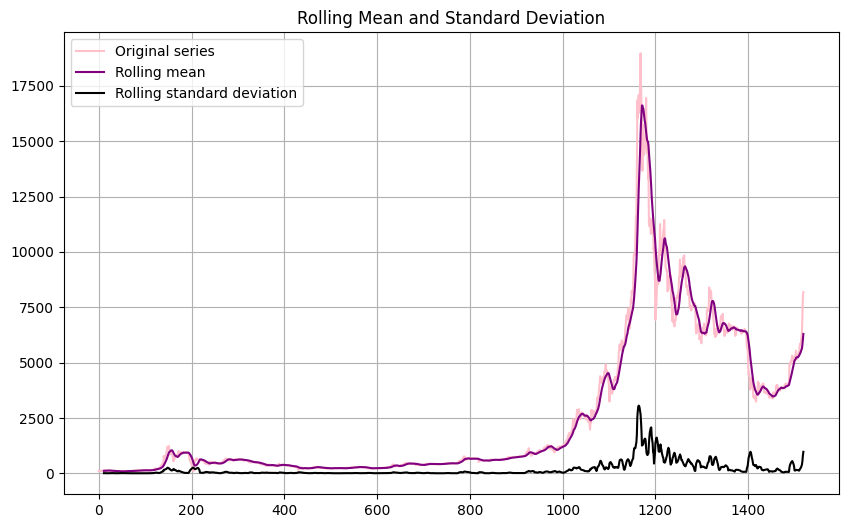

In [9]:
rolling_mean = df['BTC'].rolling(12).mean()
rolling_std = df['BTC'].rolling(12).std()

plt.figure(figsize=(10, 6))
plt.plot(df['BTC'], color='pink', label='Original series')
plt.plot(rolling_mean, color='purple', label='Rolling mean')
plt.plot(rolling_std, color='black', label='Rolling standard deviation')

plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

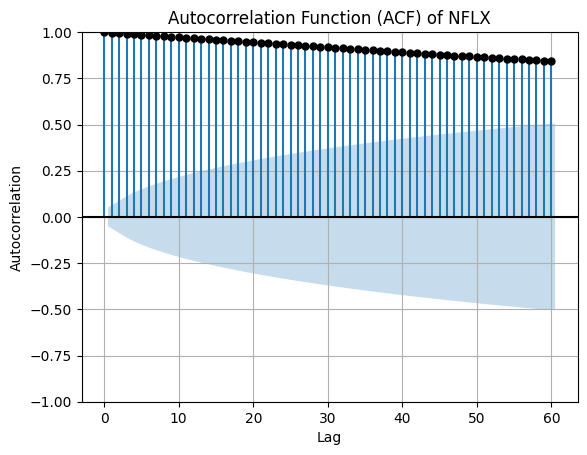

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['NFLX'], lags=60, alpha=0.05,color='black')
plt.title('Autocorrelation Function (ACF) of NFLX')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

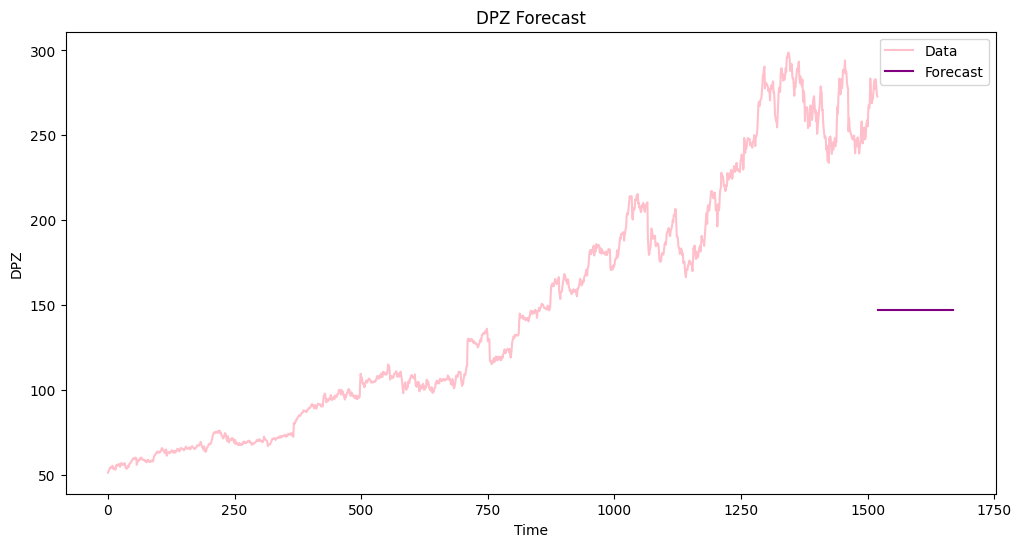

In [16]:
model = ARIMA(df['DPZ'])
fit_model = model.fit()

forecast = fit_model.get_forecast(steps=150)

plt.figure(figsize=(12, 6))
plt.plot(df['DPZ'], label='Data', color='pink')
plt.plot(forecast.predicted_mean, label='Forecast', color='purple')
plt.title('DPZ Forecast')
plt.xlabel('Time')
plt.ylabel('DPZ')
plt.legend()
plt.show()